<a href="https://colab.research.google.com/github/honey-python-world/Project_Repository/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data : Images  
# 1.Download manually the images from the google
# 2. Download dataset from kaggle.com
# 3. build a Image web Crawler
# 4.use Python libaries to scrape the images (using)


In [2]:
import numpy as np
a = np.array([[1,2,3,4,5,],[5,6,7,8,9]])
a.ndim

2

In [3]:
# How  do i convert Matrix to vector ? - flatten()
a.flatten()

array([1, 2, 3, 4, 5, 5, 6, 7, 8, 9])

In [113]:
4# Step 2:
# Prepocessing
# 1. resize
# 2. faltten
  

import os
#  iam using  lot of folders and play around the folders we need this 
import matplotlib.pyplot as plt
# to display the image
import numpy as np
# To do mathmatices operations 
from skimage.io import imread
# To read  the images and image processsing  
from skimage.transform import  resize
# all of our  images should  me some specific size

# target =[] for output
target = []
#images  =[] for input
images =[]
flat_data=[]

DATADIR = "/content/drive/MyDrive/Mini Project/project images/mini project Images"
Catergories = ["Cars",'ruby ball','cone ice cream']

for catergory in  Catergories: 
  #print(catergory)
  class_num = Catergories.index(catergory) # label encoding  the values 
  #print(class_num)
  path = os.path.join(DATADIR,catergory) # create path to use   all the images
  #print(path)
  for img in os.listdir(path):
    img_array=  imread(os.path.join(path ,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    #break
    img_resized = resize(img_array,(150,150,3)) # normalizes the values  from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [114]:

len(flat_data[0])


67500

In [115]:
150*150

22500

In [116]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

<BarContainer object of 3 artists>

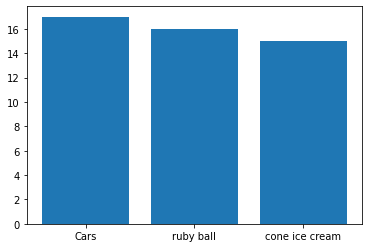

In [117]:
 unique,count = np.unique(target, return_counts= True)
 plt.bar(Catergories,count)

In [118]:
#  Next step  into  Training and Testing 
from  sklearn.model_selection  import train_test_split
x_train, x_test, y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
             {'C':[1,10,100,1000], "kernel":['linear']},
             {'C':[1,10,100,1000],"gamma":[0.001,0.0001], "kernel":['rbf']},

]
svc = svm.SVC(probability=True)
clf =   GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)




GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
y_pred =  clf.predict(x_test)
y_pred

array([1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2])

In [121]:
y_test

array([1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2])

In [122]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [123]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [75]:
confusion_matrix(y_pred, y_test) # evaluation of matrix to check whether there is prediction is correct or not

array([[2, 1, 0],
       [0, 6, 0],
       [0, 1, 5]])

In [76]:
# Save the Model  using Pickle library 
# wb means  write the bite  and store in the model  to avoid the reruning  the data again and agian 
import pickle   
pickle.dump(clf,open("mini_img_model.p","wb")) 

In [77]:
model =  pickle.load(open("mini_img_model.p","rb"))
# rb means  reading the bite

Enter The url for  Image classficationhttps://www.electrive.com/wp-content/uploads/2020/01/tata-motors-nexon-ev-indien-india-2020-04.png
(750, 1500, 4)
Predicted Output : Cars


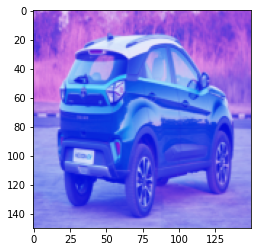

In [133]:
# testing the brand new image
flat_data =[]
url = input("Enter The url for  Image classfication")
img =imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Catergories[y_out[0]] 
print(f"Predicted Output : {y_out}") 


In [19]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.4MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 4.2MB 40.8MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 174kB 42.2MB/s 
     |████████████████████████████████| 122kB 41.2MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [20]:
# deployment
# 1 webpage - html / css / JS - Flask /django
# 2 web app - strean lit/ dash
# 3 mobile app - kotlin/java


In [127]:
%%writefile  imcapp.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import  resize
import pickle
from PIL import Image
st.title("Image Classifier using Machine learning ")
st.text("developed by Hanok-IIT Madras")
st.text("upload the Images only Car, Ruby Ball or Cone Ice Cream")

model =  pickle.load(open("mini_img_model.p","rb"))

uploaded_file = st.file_uploader("Choose an Image..",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption="Uploaded Image")

  if st.button("PREDICT IMAGE"):
    Catergories = ["Cars",'ruby ball','cone ice cream']
    st.write("PREDICTED RESULT:")
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = Catergories[y_out[0]] 
    st.write(f"Predicted Output:{y_out}") 



Overwriting imcapp.py


In [22]:
!nohup streamlit run imcapp.py &

url = ngrok.connect(port="8501")
url

nohup: appending output to 'nohup.out'


'http://96b1711c3125.ngrok.io'